In [17]:
import math
import matplotlib.pyplot as plt

In [18]:
def make_graph(lmbd, t, x, k, flip):
    range_ = []
    data = []
    custom_color = []
    if flip:
        sum = 1-poisson(lmbd,t,x,k-1,False)
    else:
        sum = poisson(lmbd,t,x,k,False)
        
    length = find_length(lmbd,t)

    # Get data
    for i in range(0, length):
        data.append(single_poisson(lmbd, t, i))
        range_.append(i)
        # Show highligthed colors
        if flip:
            if k <= i <= length:
                custom_color.append('green')
            else:
                custom_color.append('red')
        else:
            if x <= i <= k:
                custom_color.append('green')
            else:
                custom_color.append('red')
    # plotting chart
    plt.bar(range_, data, tick_label = range_,
            width = 0.7, color = custom_color)
    # Add numbers to bars
    for i in range(len(data)):
        if data[i] > 0.000009:
            plt.annotate(str(f'{data[i]:.5f}'), xy=(range_[i],data[i]), ha='center', va='bottom')
    # naming the x-axis
    plt.xlabel(f'P({x}≤X≤{k}): {sum:.4f} --- µ: {lmbd*t:.4f} --- σ2: {lmbd:.4f} --- σ: {math.sqrt(lmbd):.4f}')
    # y-axis
    plt.ylabel(f'P(X=k)')
    # title
    plt.title('Poisson distribution!')
    # show the plot
    plt.show()

In [19]:
def find_length(lmbd, t):
  steps = 0
  answer = 0
  while answer <= 0.99999:
      answer += (pow(math.e, -(lmbd*t)) * pow(lmbd*t, steps))/math.factorial(steps)
      steps += 1
  return steps

In [20]:
def single_poisson(lmbd, t, x):
    answer = (pow(math.e, -(lmbd*t)) * pow(lmbd*t, x))/math.factorial(x)
    return answer

In [21]:
def poisson(lmbd, t, x, k, steps):
    answer = 0
    for x in range (x ,k+1):
        new_answer = (pow(math.e, -(lmbd*t)) * pow(lmbd*t, x))/math.factorial(x)
        if steps:
            print(f'Probability of X = {x}: {new_answer:.5f}')
        answer += new_answer
    return answer

---------------POISSON---------------
Expected value (µ): 5.0000 --- Variance σ2: 5.0000 ---Standard deviation σ: 2.2361
Probability (x = 5): 0.17546736976785074
Probability (x ≥ 5): 0.5595067149347875
-------------------------------------


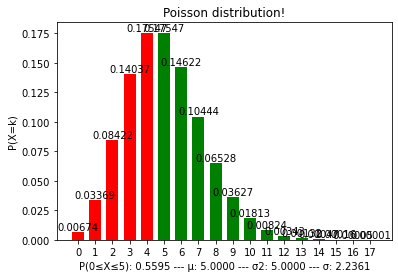

In [44]:

# My = lambda*t 
# Var = sqrt(my)
# Normaltilnærming om var ≥ 20
# Lmbd / Lambda / k
# T given time
lmbd = 5
t = 1
# From
x = 0
# To
k = 5

flip = True


print('---------------POISSON---------------')
print(f'Expected value (µ): {lmbd*t:.4f} --- Variance σ2: {lmbd:.4f} ---Standard deviation σ: {math.sqrt(lmbd):.4f}')
print(f'Probability (x = {k}): {single_poisson(lmbd,t,k)}')
if flip:
    print(f'Probability (x ≥ {k}): {1-poisson(lmbd, t, x, k-1, False)}')
else:
    print(f'Probability of ({x} ≤ X ≤ {k}): {poisson(lmbd, t, x, k, False)}')
print('-------------------------------------') 
make_graph(lmbd, t, x, k, flip)